In [1]:
import pandas as pd

filepath = '/Users/yasserali/Documents/projects/kaiser_projects/music_spotify.csv'

df = pd.read_csv(filepath)

reduced_set = df.drop(columns = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
                                 'key', 'time_signature', 'mode', 'explicit'])
X = reduced_set.drop(columns = ['popularity'])
y = reduced_set['popularity']

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop non-numeric columns and keep track of them
X_numeric = X.select_dtypes(include=['number'])
non_numeric = X.select_dtypes(exclude=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
X_scaled = scaler.fit_transform(X_numeric)

# Convert the scaled features back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'track_genre' column
non_numeric['track_genre'] = label_encoder.fit_transform(non_numeric['track_genre'])

# Concatenate the encoded non-numeric column back to the scaled features
X_f = pd.concat([X_scaled_df, non_numeric.reset_index(drop=True)], axis=1)

In [3]:
from sklearn.model_selection import train_test_split as tts
X_train_full, X_test, y_train_full, y_test = tts(X_f, y, test_size = 0.15, random_state = 42)
X_train, X_val, y_train, y_val = tts(X_train_full, y_train_full, test_size = 0.15, random_state=42)

In [22]:
X_train

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
14857,-1.265421,0.375702,-1.635535,-0.231451,-0.529189,1.750535,-0.503963,-0.086948,0.265879,-0.872366,14
38637,0.121484,-1.514336,-0.168501,0.405216,-0.458254,-0.900424,-0.504028,-0.297057,-1.203689,-0.885776,38
33452,-0.904554,0.548572,-0.220185,0.392093,-0.563237,-0.849299,-0.490609,-0.318068,-1.549288,-0.472173,33
20085,-0.543100,0.197071,0.284729,0.894945,-0.375971,-0.862231,-0.504112,-0.291805,-0.038835,0.024156,20
23353,-0.138812,0.773302,0.101846,0.413965,-0.459200,-0.910649,-0.504091,-0.344332,0.775021,-0.072481,23
...,...,...,...,...,...,...,...,...,...,...,...
52950,-0.908906,1.240049,-1.464580,-0.616792,-0.394887,1.666329,-0.503890,-0.370596,1.218591,0.190111,52
86830,0.837150,-0.004610,0.682299,-1.127597,-0.289904,-0.718180,-0.502577,3.474409,-0.235548,-0.267457,85
98594,-1.647658,0.214358,-1.905883,-1.309928,3.890480,1.549044,-0.504112,1.520390,-0.115977,1.438357,98
96553,-0.430236,0.629244,-1.150499,-0.426110,-0.453525,-0.321513,-0.504112,-0.449387,0.134736,-0.365895,96


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Epoch 1/100


/Users/yasserali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2060/2060 - 1s - 675us/step - loss: 562.4395 - mae: 19.4027 - val_loss: 483.2996 - val_mae: 18.1109
Epoch 2/100
2060/2060 - 1s - 463us/step - loss: 508.1656 - mae: 18.4652 - val_loss: 468.9498 - val_mae: 17.6739
Epoch 3/100
2060/2060 - 1s - 459us/step - loss: 497.8190 - mae: 18.2356 - val_loss: 463.4246 - val_mae: 17.5461
Epoch 4/100
2060/2060 - 1s - 459us/step - loss: 493.1138 - mae: 18.1365 - val_loss: 461.2352 - val_mae: 17.5345
Epoch 5/100
2060/2060 - 1s - 460us/step - loss: 486.8836 - mae: 18.0036 - val_loss: 457.4774 - val_mae: 17.4515
Epoch 6/100
2060/2060 - 1s - 459us/step - loss: 481.9849 - mae: 17.8887 - val_loss: 454.7555 - val_mae: 17.3451
Epoch 7/100
2060/2060 - 1s - 458us/step - loss: 480.5845 - mae: 17.8647 - val_loss: 455.7995 - val_mae: 17.3004
Epoch 8/100
2060/2060 - 1s - 457us/step - loss: 476.2317 - mae: 17.7687 - val_loss: 453.6407 - val_mae: 17.3201
Epoch 9/100
2060/2060 - 1s - 458us/step - loss: 473.5306 - mae: 17.7237 - val_loss: 453.0689 - val_mae: 17.2979
Epoc

In [15]:
mse

428.35090868673143

In [17]:
r2

0.13128628673536713

In [19]:
# Calculate the correlation matrix
correlation_matrix = reduced_set.corr()

# Extract the correlation values for the 'popularity' column
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)

print(popularity_correlation)

ValueError: could not convert string to float: 'acoustic'

In [20]:
# Combine X and y into a single DataFrame
data = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation values for the 'popularity' column
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)

print(popularity_correlation)

popularity          1.000000
loudness            0.050118
danceability        0.035670
track_genre         0.031333
tempo               0.013527
energy             -0.000255
duration_ms        -0.005883
liveness           -0.006652
acousticness       -0.026086
valence            -0.039758
speechiness        -0.045606
instrumentalness   -0.097416
Name: popularity, dtype: float64


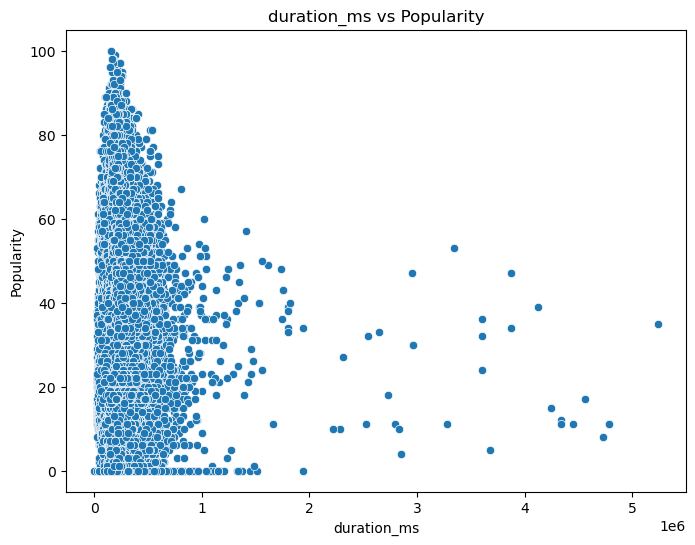

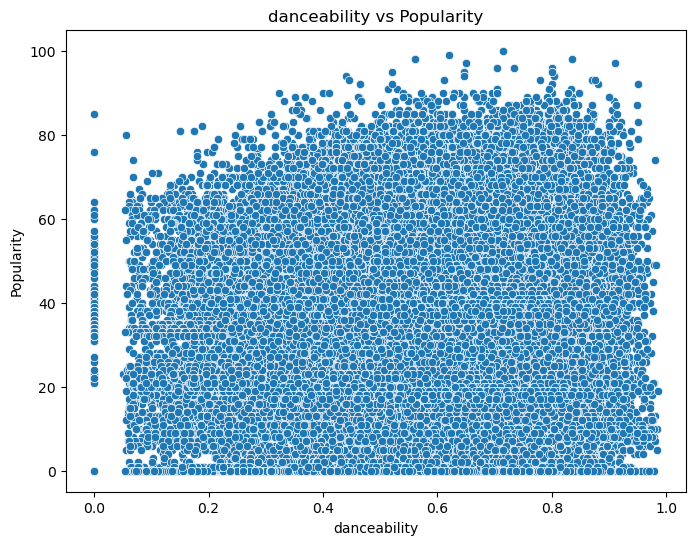

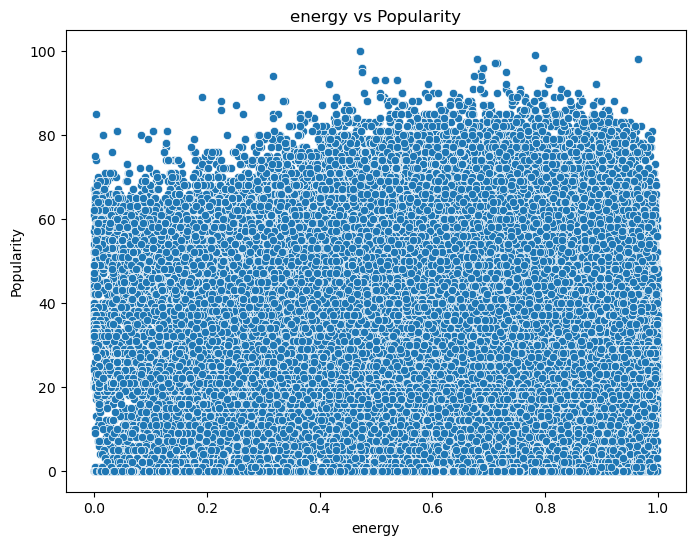

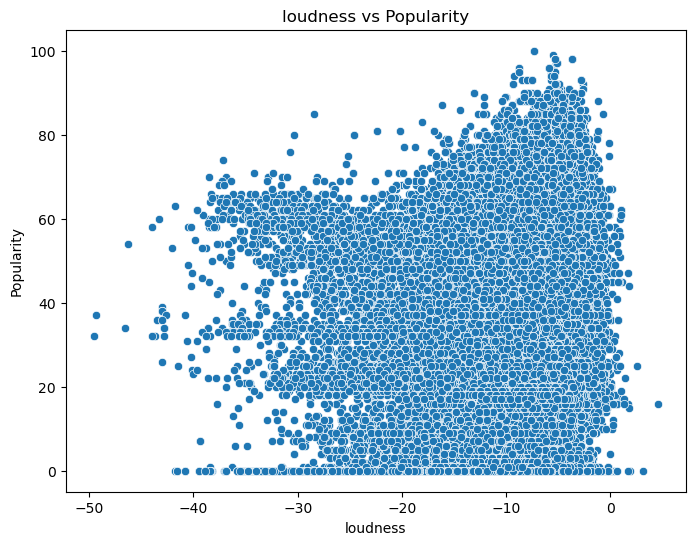

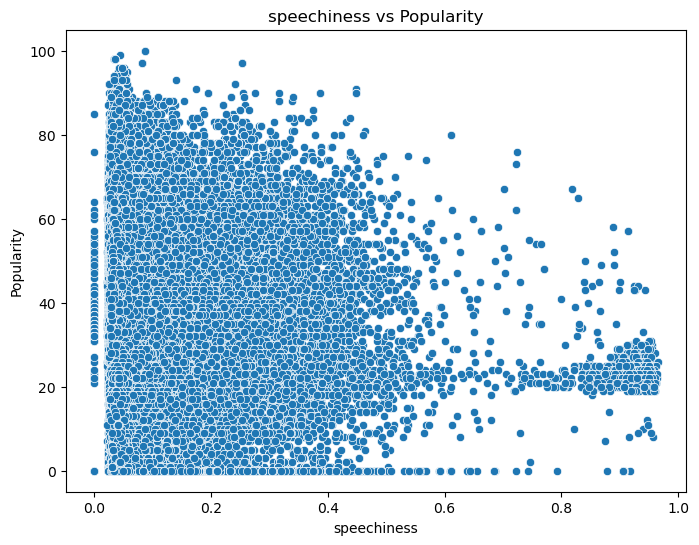

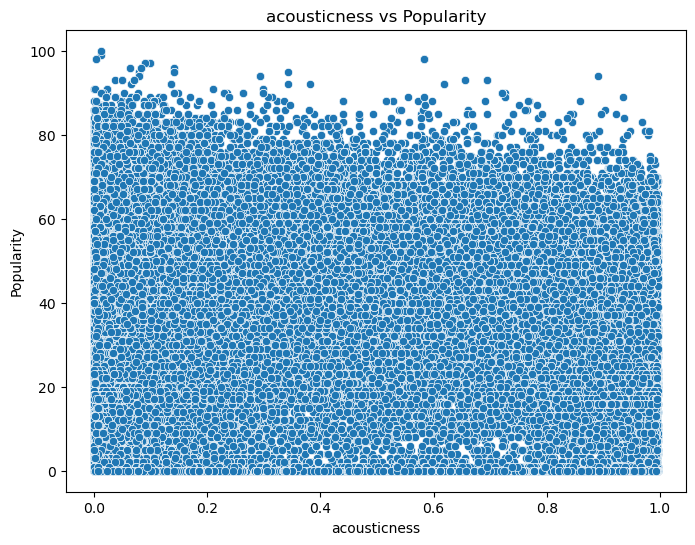

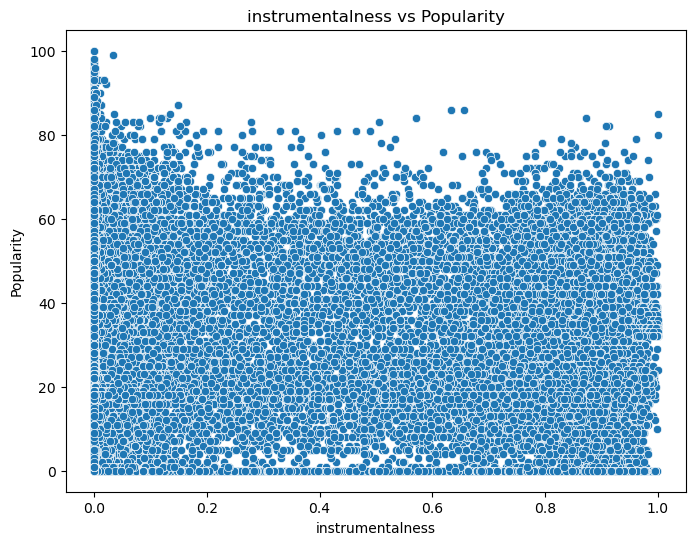

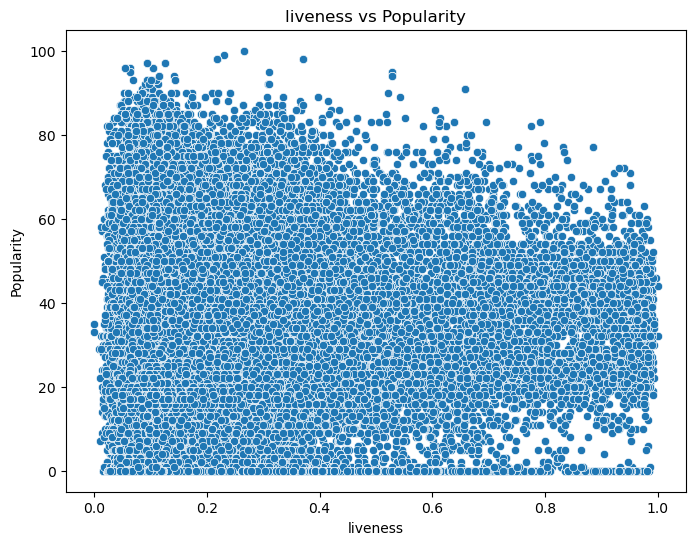

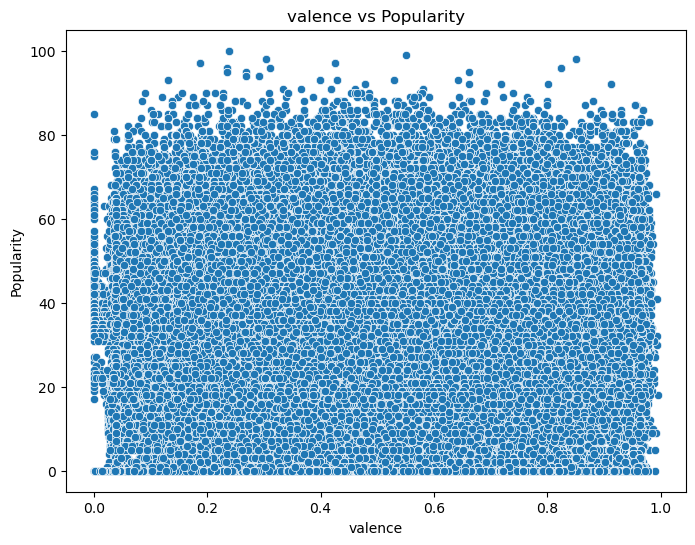

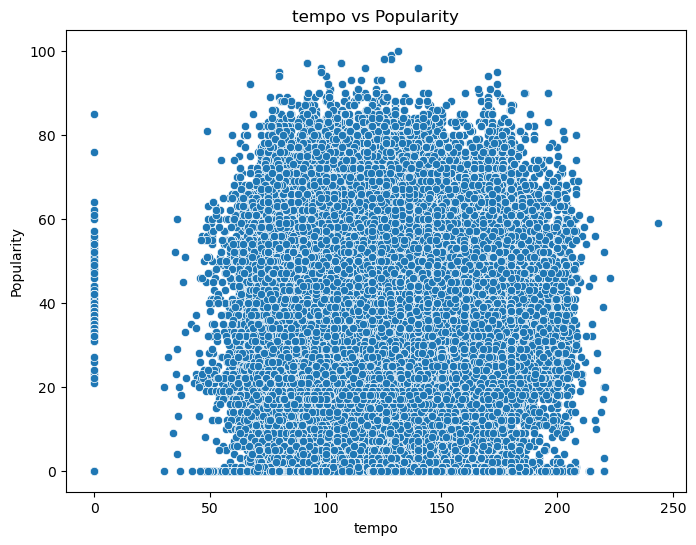

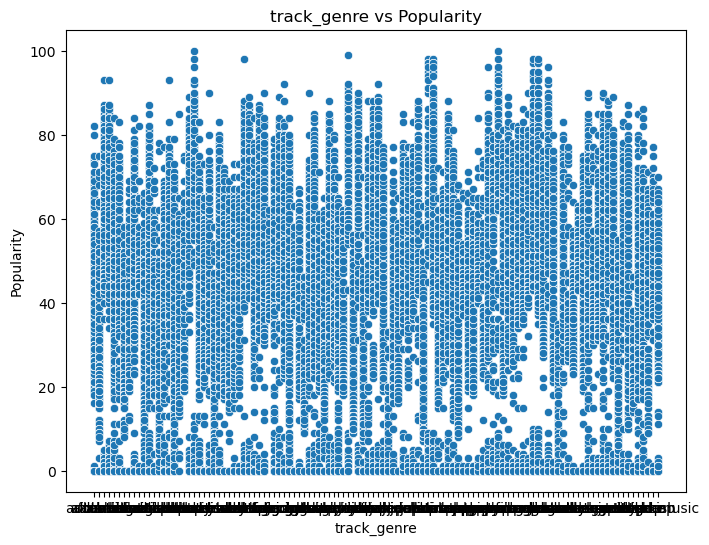

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for each feature against the target variable
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'{column} vs Popularity')
    plt.xlabel(column)
    plt.ylabel('Popularity')
    plt.show()

In [24]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/4c/35/81076f4c9b0484d07735aa1ec343e5c2a6d8d59c72a142f0b89fa00258a0/lightgbm-4.4.0-py3-none-macosx_14_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'regression',  # or 'binary' for classification tasks
    'metric': 'rmse',  # or 'binary_logloss' for classification tasks
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the model
model = lgb.train(params, train_data, valid_sets=[train_data, test_data])

# Predict on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 358.49
R^2 Score: 0.27


In [32]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/53/7d/dc4fda290282be0fb45efd4e9ee5bdc225b5690d0f53048a94ec028b6a3b/xgboost-2.1.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
# Encode categorical features
le = LabelEncoder()
X['track_genre'] = le.fit_transform(X['track_genre'])

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
param_grid = {
    'max_depth': [3,6,10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[100, 200],
    'colsample_bytree': [0.3, 0.7]
}

# initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# set up GridSearchCV
grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid=param_grid,
                           cv = 3, 
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_

yhat = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mean Squared Error: 230.80
R^2 Score: 0.53
Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=6, n_estimators=200; to

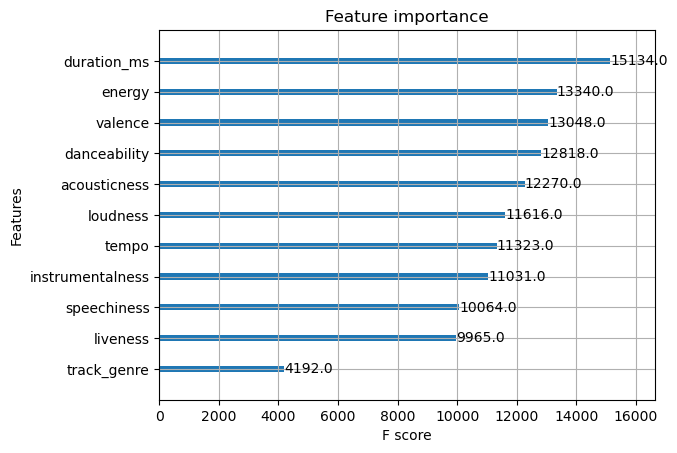

             Feature  Importance
10       track_genre    0.506962
8            valence    0.054465
1       danceability    0.053456
7           liveness    0.051533
2             energy    0.051010
9              tempo    0.050358
3           loudness    0.050173
4        speechiness    0.047292
5       acousticness    0.047077
0        duration_ms    0.045280
6   instrumentalness    0.042395


In [53]:
import matplotlib.pyplot as plt

# Plot feature importances
xgb.plot_importance(best_xgb_model)
plt.show()

# Extract feature importances
importances = best_xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

In [56]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Train and evaluate with all features
mse, r2 = train_evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test)
print(f'All features - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')

# List of features in the order they should be removed based on importance
features_to_remove = [6, 0, 5, 4, 3, 9, 2, 7, 1, 8, 10]

# Convert feature indices to names
feature_names = X.columns
features_to_remove_names = [feature_names[i] for i in features_to_remove]

# Iteratively remove least important features and evaluate
for i in range(len(features_to_remove_names)-2):
    X_train_reduced = X_train.drop(columns=features_to_remove_names[:i + 1])
    X_test_reduced = X_test.drop(columns=features_to_remove_names[:i + 1])
    mse_reduced, r2_reduced = train_evaluate_model(best_xgb_model, X_train_reduced, y_train, X_test_reduced, y_test)
    print(f'Removed {i + 1} least important features - Mean Squared Error: {mse_reduced:.2f}, R^2 Score: {r2_reduced:.2f}')

All features - Mean Squared Error: 230.80, R^2 Score: 0.53
Removed 1 least important features - Mean Squared Error: 230.04, R^2 Score: 0.53
Removed 2 least important features - Mean Squared Error: 248.24, R^2 Score: 0.50
Removed 3 least important features - Mean Squared Error: 252.00, R^2 Score: 0.49
Removed 4 least important features - Mean Squared Error: 255.12, R^2 Score: 0.48
Removed 5 least important features - Mean Squared Error: 355.65, R^2 Score: 0.28
Removed 6 least important features - Mean Squared Error: 357.25, R^2 Score: 0.28
Removed 7 least important features - Mean Squared Error: 359.05, R^2 Score: 0.27
Removed 8 least important features - Mean Squared Error: 361.07, R^2 Score: 0.27
Removed 9 least important features - Mean Squared Error: 363.87, R^2 Score: 0.26


In [57]:
yhat

array([42.6274   , 15.00729  ,  5.4707327, ..., 39.625057 , 39.154427 ,
       41.318813 ], dtype=float32)

       Actual  Predicted
0          50  43.731243
1          11  19.809160
2           0  12.922245
3           0  23.777376
4          57  29.157043
...       ...        ...
14995      32  31.764454
14996      40  32.990321
14997      21  35.107437
14998      57  31.717559
14999      21  28.075414

[15000 rows x 2 columns]


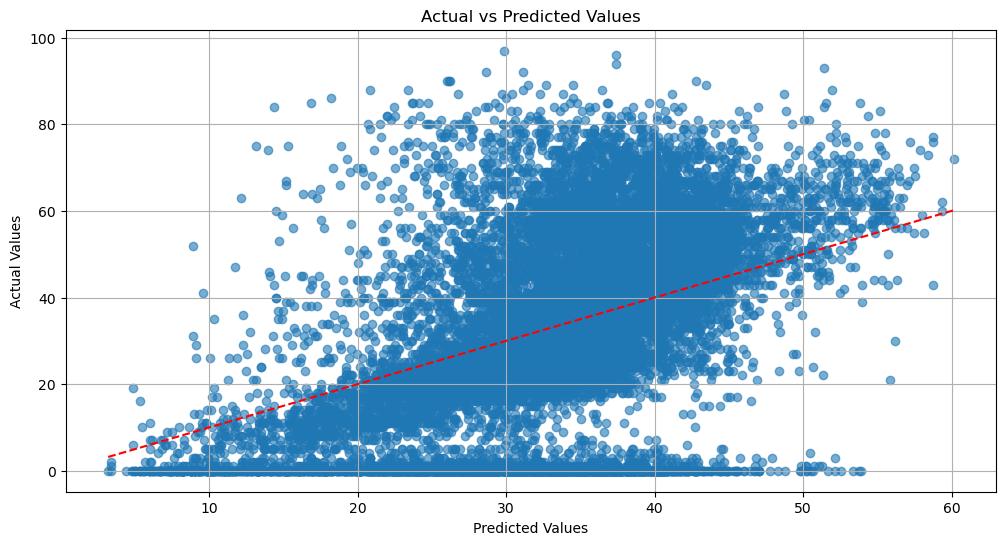

In [70]:
# Display the first 200 values of yhat and y_test
comparison_df = pd.DataFrame({'Actual': y_test[:15000].values, 'Predicted': y_pred[:15000]})
print(comparison_df)

# Plot the first 200 values as a scatter plot where y is y_test and x is yhat
plt.figure(figsize=(12, 6))
plt.scatter(comparison_df['Predicted'], comparison_df['Actual'], alpha=0.6)
plt.plot([comparison_df['Predicted'].min(), comparison_df['Predicted'].max()], 
         [comparison_df['Predicted'].min(), comparison_df['Predicted'].max()], 
         color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid(True)
plt.show()

In [65]:
len(yhat)

22800